In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [5]:
#Import Dataset
poiedin = pd.read_csv("data-ijcai15/poiList-ijcai15/POI-Edin.csv", sep =";")
costprofcat = pd.read_csv("data-ijcai15/costProf-ijcai15/costProfCat-EdinPOI-all.csv", sep = ";")
uservisit = pd.read_csv("data-ijcai15/userVisits-ijcai15/userVisits-Edin.csv", sep = ";")

poiedin

,poiID,poiName,lat,long,theme
0,1,Edinburgh_Castle,55.948611,-3.200833,Historical
1,2,Holyrood_Palace,55.952500,-3.172500,Historical
2,3,National_Museum_of_Scotland,55.946940,-3.190000,Museum
3,4,Scottish_Parliament_Building,55.952158,-3.175204,Structure
4,5,Forth_Rail_Bridge,56.000421,-3.388726,Structure
5,6,Forth_Road_Bridge,56.000830,-3.404170,Structure
6,7,Arthur%27s_Seat,55.944170,-3.161940,Park
7,8,Scott_Monument,55.952417,-3.193278,Historical
8,9,St_Giles%27_Cathedral,55.949440,-3.190830,Cultural
9,10,Calton_Hill,55.955280,-3.182220,Park


# Preprocessing Data

Merging data poiedin sama costprofcat supaya lebih jelas dari satu destinasi wisata ke wisata lainnya dengan biaya dan populeritasnya

In [6]:
# Merge df2 with df1 to get 'from' location details
merged_df = costprofcat.merge(poiedin, left_on="from", right_on="poiID", suffixes=('', '_from'))

# Merge again with df1 to get 'to' location details
merged_df = merged_df.merge(poiedin, left_on="to", right_on="poiID", suffixes=('_from', '_to'))

# Create the new 'name' column
merged_df["name"] = merged_df["poiName_from"] + " - " + merged_df["poiName_to"]

# Select relevant columns for the final DataFrame
final_df = merged_df[[
    "name", "cost", "profit", "category", "lat_from", "long_from", "lat_to", "long_to"
]]

# Rename latitude and longitude columns for clarity
final_df = final_df.rename(columns={
    "lat_from": "from_lat",
    "long_from": "from_long",
    "lat_to": "to_lat",
    "long_to": "to_long"
})

# Display the final DataFrame
print(final_df)

                                                  name          cost  profit  \
0                   Edinburgh_Castle - Holyrood_Palace   1818.249473     699   
1        National_Museum_of_Scotland - Holyrood_Palace   1254.142563     699   
2       Scottish_Parliament_Building - Holyrood_Palace    172.775758     699   
3                  Forth_Rail_Bridge - Holyrood_Palace  14486.057581     699   
4                  Forth_Road_Bridge - Holyrood_Palace  15400.268955     699   
..                                                 ...           ...     ...   
751               Our_Dynamic_Earth - Edinburgh_Castle   1663.949605    4569   
752            Craiglockhart_Castle - Edinburgh_Castle   4010.288790    4569   
753  Scottish_National_Gallery_of_Modern_Art - Edin...   1684.813773    4569   
754  Old_College,_University_of_Edinburgh - Edinbur...    860.971474    4569   
755          New_College,_Edinburgh - Edinburgh_Castle    375.229158    4569   

       category   from_lat  from_long  

In [7]:
final_df.head()

,name,cost,profit,category,from_lat,from_long,to_lat,to_long
0,Edinburgh_Castle - Holyrood_Palace,1818.249473,699,Historical,55.948611,-3.200833,55.9525,-3.1725
1,National_Museum_of_Scotland - Holyrood_Palace,1254.142563,699,Historical,55.946940,-3.190000,55.9525,-3.1725
2,Scottish_Parliament_Building - Holyrood_Palace,172.775758,699,Historical,55.952158,-3.175204,55.9525,-3.1725
3,Forth_Rail_Bridge - Holyrood_Palace,14486.057581,699,Historical,56.000421,-3.388726,55.9525,-3.1725
4,Forth_Road_Bridge - Holyrood_Palace,15400.268955,699,Historical,56.000830,-3.404170,55.9525,-3.1725


In [8]:
edinburgh_map = folium.Map(location=[55.9533, -3.1883], zoom_start=13)

# Color mapping for categories
category_colors = {
    "Historical": "blue",
    "Museum": "green",
    "Structure": "orange",
    "Park": "purple",
    "Cultural": "red",
    "Entertainment": "pink",
}

for _, row in poiedin.iterrows():
    folium.Marker(
        location=[row["lat"], row["long"]],  # Access latitude and longitude from DataFrame
        popup=f"<b>{row['poiName']}</b><br>Category: {row['theme']}",
        icon=folium.Icon(color=category_colors.get(row["theme"], "gray"))  # Use category for color
    ).add_to(edinburgh_map)

# Save the map to an HTML file
edinburgh_map.save("edinburgh_poi_map.html")

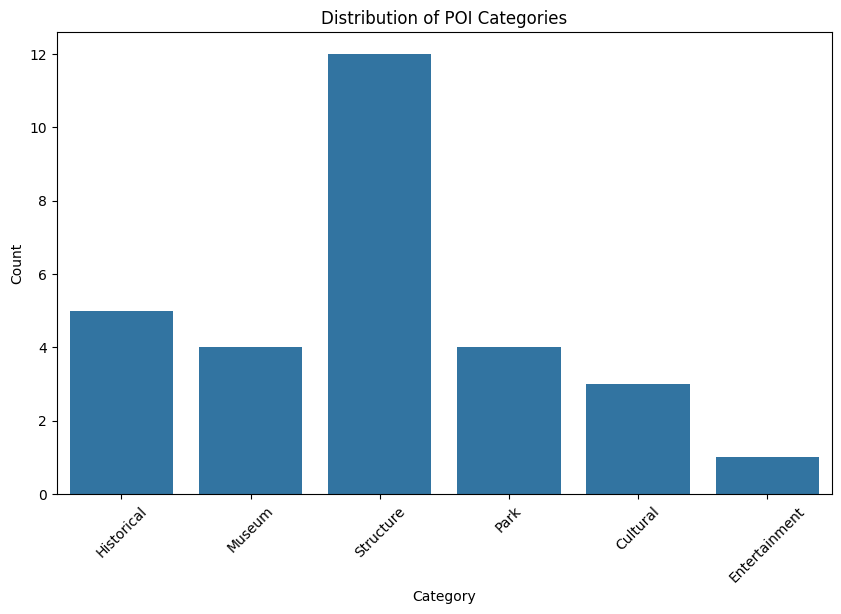

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='theme', data=poiedin)
plt.title('Distribution of POI Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

10 Tempat Wisata Terpopuler:
poiName
Edinburgh_Castle                        4569
St_Giles%27_Cathedral                   4452
National_Museum_of_Scotland             3140
New_College,_Edinburgh                  2972
Scott_Monument                          1887
Royal_Scottish_Academy_Building         1726
Balmoral_Hotel                          1559
Edinburgh_Festival_Theatre              1360
Princes_Street_Gardens                  1351
Old_College,_University_of_Edinburgh    1325
Name: count, dtype: int64


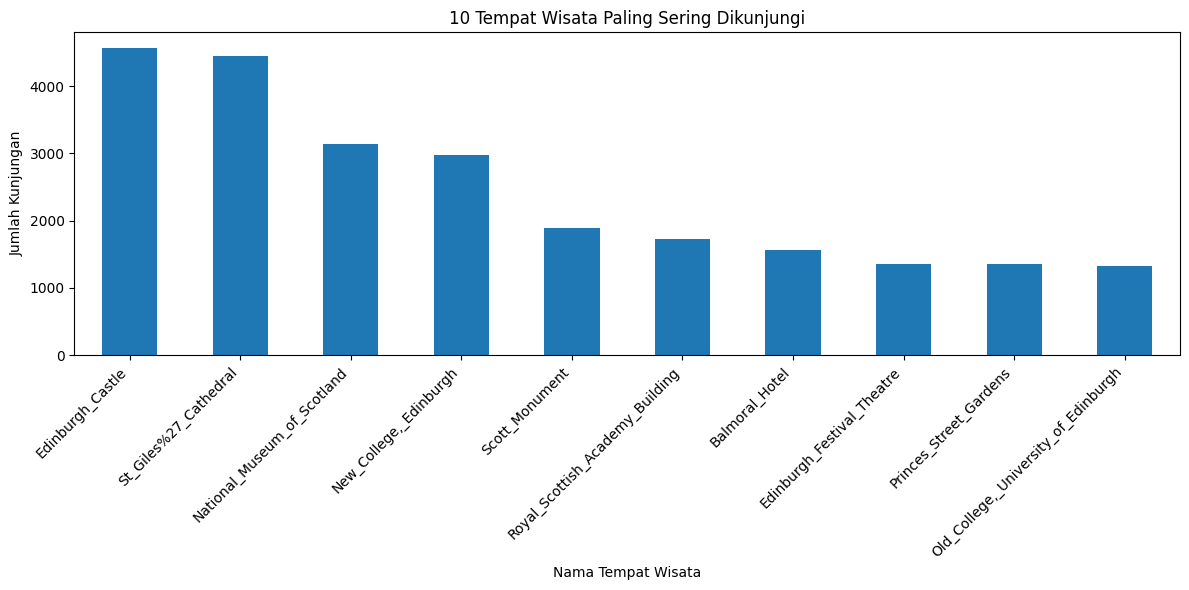

In [10]:
# Analisis Frekuensi Kunjungan Pengguna

# Gabungkan data kunjungan pengguna (uservisit) dengan data POI (poiedin)
merged_visits = uservisit.merge(poiedin, left_on='poiID', right_on='poiID', how='left')

# Hitung berapa kali setiap tempat wisata dikunjungi
visit_counts = merged_visits['poiName'].value_counts()

# Tampilkan 10 tempat wisata yang paling sering dikunjungi
print("10 Tempat Wisata Terpopuler:")
print(visit_counts.head(10))

# Visualisasi frekuensi kunjungan
plt.figure(figsize=(12, 6))
visit_counts.head(10).plot(kind='bar')
plt.title('10 Tempat Wisata Paling Sering Dikunjungi')
plt.xlabel('Nama Tempat Wisata')
plt.ylabel('Jumlah Kunjungan')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar lebih mudah dibaca
plt.tight_layout()
plt.show()

# Analisis lebih lanjut (opsional)
# Anda bisa mengelompokkan tempat wisata berdasarkan kategori dan melihat frekuensi kunjungan per kategori
# Atau, analisis tren kunjungan berdasarkan waktu (jika data uservisit memiliki informasi waktu kunjungan)
# Contoh:
# visit_counts_by_category = merged_visits.groupby('theme')['poiName'].count()
# print("\nJumlah Kunjungan per Kategori:")
# print(visit_counts_by_category)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33944 entries, 0 to 33943
Data columns (total 1 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   photoID;"userID";"dateTaken";"poiID";"poiTheme";"poiFreq";"seqID"  33944 non-null  object
dtypes: object(1)
memory usage: 265.3+ KB


C:\Users\MyBook Hype AMD\AppData\Local\Temp\ipykernel_13764\2492909435.py:15: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  user_visits_df['dateTaken'] = pd.to_datetime(user_visits_df['dateTaken'], unit='s', errors='coerce')


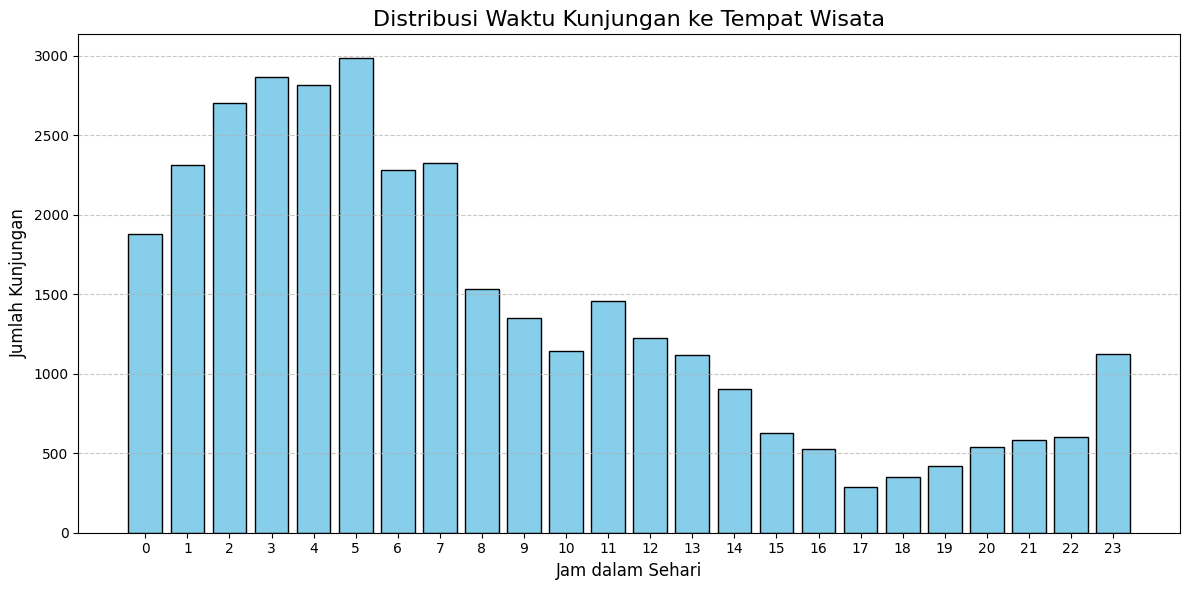

In [12]:
import pandas as pd

# Membaca file userVisits-Edin.csv
file_path = 'data-ijcai15/userVisits-ijcai15/userVisits-Edin.csv'
user_visits_df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama untuk memahami struktur data
user_visits_df.head(), user_visits_df.info()

# Memisahkan kolom berdasarkan delimiter ";"
user_visits_df = user_visits_df.iloc[:, 0].str.split(';', expand=True)
user_visits_df.columns = ["photoID", "userID", "dateTaken", "poiID", "poiTheme", "poiFreq", "seqID"]

# Mengonversi kolom 'dateTaken' ke format datetime untuk analisis waktu
user_visits_df['dateTaken'] = pd.to_datetime(user_visits_df['dateTaken'], unit='s', errors='coerce')

# Menampilkan beberapa baris pertama setelah pemisahan kolom
user_visits_df.head()
import matplotlib.pyplot as plt

# Menambahkan kolom jam dari 'dateTaken'
user_visits_df['hour'] = user_visits_df['dateTaken'].dt.hour

# Menghitung jumlah kunjungan berdasarkan jam
hourly_visits = user_visits_df['hour'].value_counts().sort_index()

# Membuat visualisasi
plt.figure(figsize=(12, 6))
plt.bar(hourly_visits.index, hourly_visits.values, color='skyblue', edgecolor='black')
plt.title('Distribusi Waktu Kunjungan ke Tempat Wisata', fontsize=16)
plt.xlabel('Jam dalam Sehari', fontsize=12)
plt.ylabel('Jumlah Kunjungan', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Menampilkan grafik
plt.show()

       visit_count
poiID             
1             4569
2              699
3             3140
4              886
5               12
6               11
7              378
8             1887
9             4452
10             845
11             999
12            1208
13            1360
14             411
15            1726
16             423
17            1303
18            1351
19            1559
20             881
21             167
22             317
23             480
24             409
25               5
27             169
28            1325
29            2972


<Figure size 1200x600 with 0 Axes>

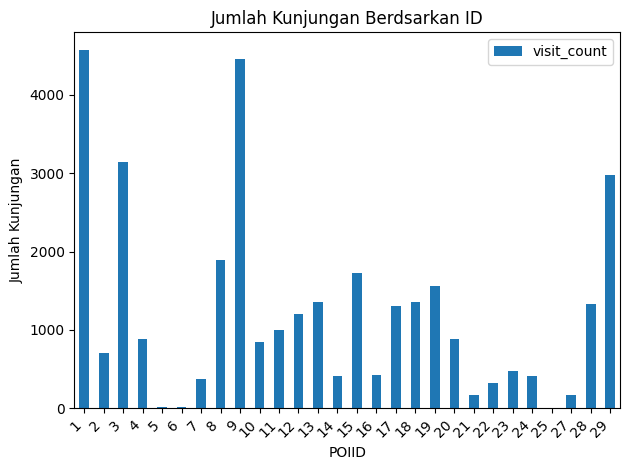

In [24]:
# Menghitung jumlah kunjungan per POI

poi_photo = uservisit[["photoID", "poiID"]].groupby('poiID').agg(np.size)

poi_photo.columns = ['visit_count']

print(poi_photo)

plt.figure(figsize=(12, 6))
poi_photo.plot(kind='bar')
plt.title('Jumlah Kunjungan Berdsarkan ID')
plt.xlabel('POIID')
plt.ylabel('Jumlah Kunjungan')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar lebih mudah dibaca
plt.tight_layout()
plt.show()